# Deep Learning

This notebook shows how to build a deep learning model to predict the quality score of different wines

In [29]:
# Initial imports
from path import Path
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

In [30]:
# Read in data
data = Path("../Resources/winequality.csv")
df = pd.read_csv(data, delimiter=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [31]:
# Create the features (X) and target (y) sets
X = df.iloc[:, 0:11].values
y = df["quality"].values

In [32]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [33]:
# Define the model - shallow neural net
number_hidden_nodes = 8
number_input_features = 11

nn = Sequential()
# Hidden layer
nn.add(
    Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu")
)
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [34]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Train the model
model_1 = nn.fit(X, y, validation_split=0.3, epochs=200, verbose=0)

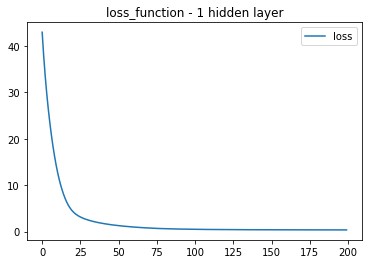

In [35]:
# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

In [36]:
# Define the model - deep neural net
number_input_features = 11
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 4

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
# Generally speaking, there should be fewer neurons in deeper layers, but of course, you should
# experiment!
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [37]:
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Loss is calculated base on the train set, val_loss is calculated base on the validation set. 
# If you have loss noticeably lower than val_loss it is the sign of overfitting. 
# Loss is the error evaluated during training a model, val_loss is the error during validation.

# Fit the model
model_2 = nn.fit(X, y, validation_split=0.3, epochs=200, verbose=0)

# validation split can be used as an alternative to test_train_split in sklearn
# When fitting the model, you can set the parameter verbose=0 in the fit() method to mute the printing of each epoch's results.

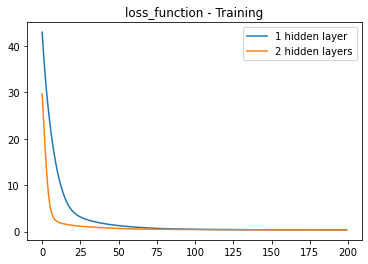

In [38]:
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("loss_function - Training")
plt.legend(["1 hidden layer", "2 hidden layers"])
plt.show()

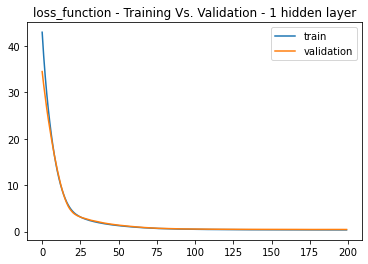

In [39]:
# Train vs test for shallow net
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 1 hidden layer")
plt.legend(["train", "validation"])
plt.show()

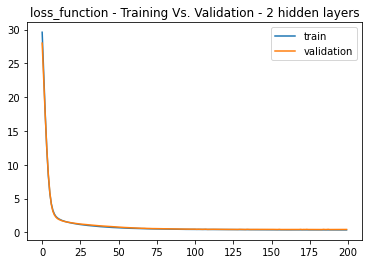

In [40]:
# Train vs test for deep net
plt.plot(model_2.history["loss"])
plt.plot(model_2.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 2 hidden layers")
plt.legend(["train", "validation"])
plt.show()